# NLP Project


**The Comparative Analysis of Language Usage project aims to explore and analyze the prevalence of programming languages between JavaScript and Python in the top 100 most forked repositories on GitHub. By scraping README data from these repositories and extracting code snippets, this project will provide insights into the language preferences of developers within the open-source community.**

## Project Goals
1. **Create a Robust and Diverse Dataset:**
   Collect a dataset comprising a minimum of 100 of the most forked repositories from GitHub, covering a wide range of domains and project types. This dataset will serve as the foundation for the language analysis and should include repositories of varying sizes and purposes to ensure a representative sample.

2. **Accurate Language Detection and Comparison:**
   Develop a language detection mechanism using NLP techniques to accurately identify and extract JavaScript and Python code snippets from the scraped README content. Calculate the frequency of these code snippets within the dataset and generate a comparative analysis of the prevalence of JavaScript and Python across the repositories.

3. **Provide Insights and Visualizations:**
   Produce meaningful insights and visualizations that effectively communicate the language usage trends between JavaScript and Python. Create a variety of visual representations, such as bar charts, heatmaps, and language distribution plots, to offer a clear and comprehensive view of how these two languages are utilized within the top 100 GitHub repositories.


## Imports:    

In [1]:
# Credential imports
from env import github_token, github_username

# Scraping related imports
import requests
from bs4 import BeautifulSoup

# NLP related imports
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import unicodedata
import re

# General data manipulation imports
import pandas as pd
import numpy as np
from time import strftime
from typing import Dict, List, Optional, Union, cast
import os
import json

import matplotlib.pyplot as plt

# For splitting the data
from sklearn.model_selection import train_test_split

import explore as e
import wrangle as w
import model as m

# Quiet all warnings
import warnings
warnings.filterwarnings('ignore')

## Wrangle
- This dataset was scraped from the 'forked repositories' list on GitHub
- Contains 178 rows, each representing a unique repository
- No nulls were found in the dataset
- No duplicates were found in the dataset
- No outlier handling was performed on the data
- Split 70/15/15 into train, validate and test (Random_state=123)

In [2]:
# Bring in the python and javascript data
train, validate, test = w.wrangle_readmes()

Returning Python and Java-script data


## Data Dictionary

| Attribute | Definition | Data Type |
| ----- | ----- | ----- |
| repo_name | the name of the source repository | string |
| url | the path of the source repository | string |
| language | the language the project was written in | string |
| readme_content | the original readme content | string |
| cleaned_content | a normalized version of the readme content | string |
| lemmatized | a normalized version of the readme content | string |

**


# Quick Data Preview

In [3]:
#code to preview the train dataset
e.data_preview(train)

,repo_name,url,language,readme_content,cleaned_content,lemmatized
88,localstack/localstack,https://github.com/localstack/localstack/blob/...,Python,⚡ We are thrilled to announce LocalStack 2.2 w...,we are thrilled to announce localstack 22 whi...,thrilled announce localstack 22 brings new fea...
4,zero-to-mastery/start-here-guidelines,https://github.com/zero-to-mastery/start-here-...,Python,One rule of this community:We don't care if yo...,one rule of this communitywe don't care if you...,one rule communitywe care break thing playgrou...
13,bettiolo/node-echo,https://github.com/bettiolo/node-echo/blob/mas...,JavaScript,"node-echonode.js echo server, returns request ...",nodeechonodejs echo server returns request dat...,nodeechonodejs echo server return request data...
10,chartjs/Chart.js,https://github.com/chartjs/Chart.js/blob/maste...,JavaScript,Simple yet flexible JavaScript cha...,simple yet flexible javascript cha...,simple yet flexible javascript charting design...
81,gulpjs/gulp,https://github.com/gulpjs/gulp/blob/master/REA...,JavaScript,The streaming build system Wh...,the streaming build system wh...,streaming build system gulpautomation gulp too...


# Explore

In [4]:
# get data
df = e.get_data(train)

**Between JavaScript and Python, which language exhibits greater prevalence within the content of the READMEs?**

Python        67
JavaScript    58
Name: language, dtype: int64
Python        0.536
JavaScript    0.464
Name: language, dtype: float64


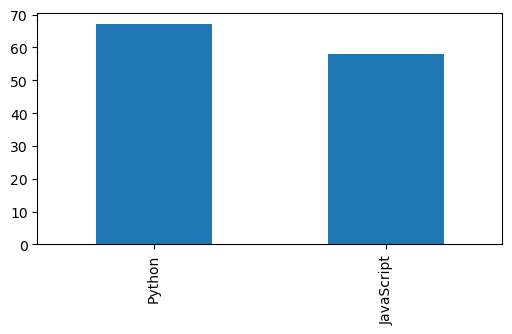

In [5]:
e.display_prevalence(df)

### Observation:
- Python exhibits greater prevalence in this sample of readmes

**What are the most frequently occuring words in Python?**

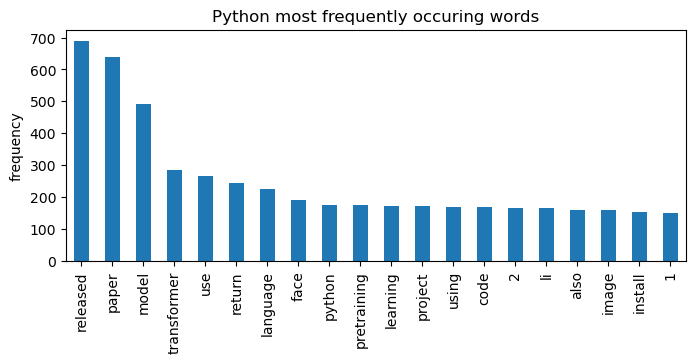

In [6]:
e.most_frequent_python(df)

### Observation:
- The top five most frequently occuring words in Python readmes are: 'released', 'paper', 'model', 'transformer', and 'use'

**What are the most frequently occuring words in JavaScript?**

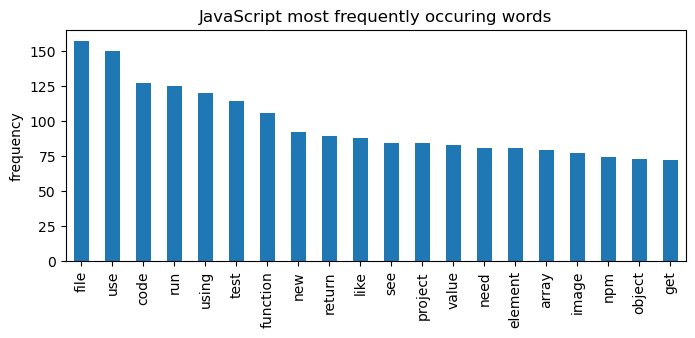

In [7]:
e.most_frequent_javascript(df)

### Observation:
- The top five most frequently occuring words in Javascript readmes are: 'file', 'use', 'code', 'run', and 'using'

**What are the most frequently occuring words overall?**

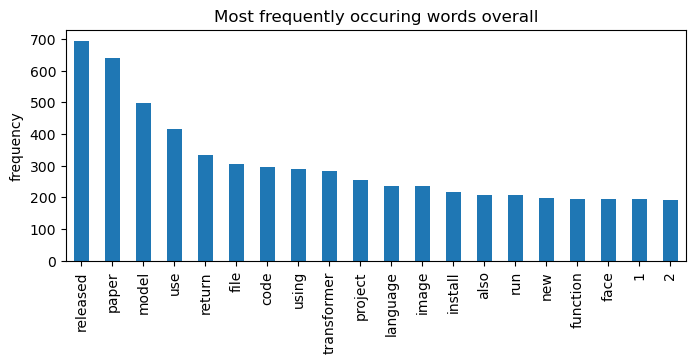

In [8]:
e.most_frequent_overall(df)

### Observation:
- The top five most frequently occuring words in readmes overall are: 'released', 'paper', 'model', 'use', 'return'

**What words are unique to Python readmes?**

In [9]:
freq_df = e.make_frequency_df(df)

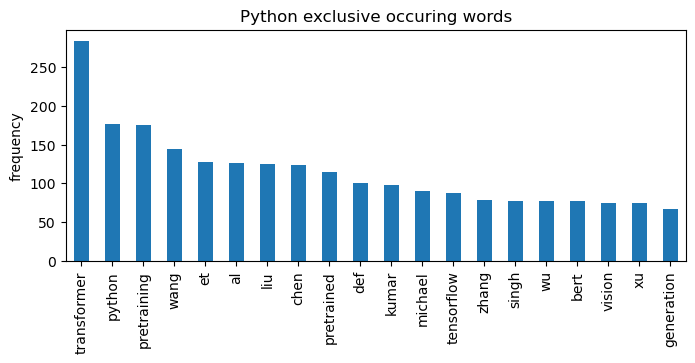

In [10]:
e.python_frequent_exclusive_words(freq_df)

### Observation:
- The top five most frequently occuring words that are exclusive to Python readmes are: 'transformer', 'python', 'pretraining', 'wang', and 'et'

**What words are unique to JavaScript readmes?**

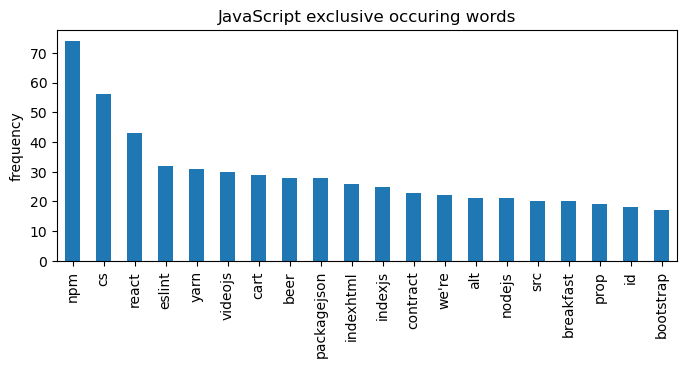

In [11]:
e.javascript_frequent_exclusive_words(freq_df)

### Observation:
- The top five most frequently occuring words that are exclusive to JavaScript readmes are: 'npm', 'cs', 'react', 'eslint', and 'yarn'

## Stats testing

In [12]:
e.stats_test_top_80(train)

Word: 'learning'
T-Test Statistic: 2.2079481330226125
P-value: 0.034534109769450407
There is a significant difference in word 'learning' frequencies among languages.

Word: 'test'
T-Test Statistic: -2.0819121676664314
P-value: 0.04432285472808051
There is a significant difference in word 'test' frequencies among languages.

Word: 'library'
T-Test Statistic: 2.899280244376005
P-value: 0.0070588457243989005
There is a significant difference in word 'library' frequencies among languages.

Word: 'create'
T-Test Statistic: -2.410692774382528
P-value: 0.01997552965013609
There is a significant difference in word 'create' frequencies among languages.

Word: 'line'
T-Test Statistic: 2.2697904541958334
P-value: 0.032487166626383894
There is a significant difference in word 'line' frequencies among languages.



# Modeling

In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test = m.preprocess(train, validate, test)

In [14]:
m.baseline(train)

Most Common Class: Python
Baseline Accuracy: 0.54


In [15]:
m.test_random_forest(X_train, y_train, X_test, y_test)

Test Accuracy: 0.63


## Observation:
- The Random Forest model performs at 63% accuracy on test data, a 9% improvement on baseline

# Conclusion
In the realm of Natural Language Processing (NLP), our analysis delved into the linguistic patterns and language prevalence within the READMEs of the top 100 most forked repositories on GitHub. Our findings uncovered several intriguing insights. Firstly, we observed a slightly higher prevalence of the Python language within README contents, constituting 54% of the distribution compared to JavaScript's 46%. Delving into the most frequently used words, "model" surfaced as a dominant term across the repository ReadMe texts, particularly pronounced within the Python language. Additionally, the word "function" held significance across all repositories, notably emerging as the most frequent term in JavaScript. Notably, we engaged in bigram frequency analysis, revealing notable pairs of adjacent words in JavaScript code segments, such as "function expression" and "npm test." 

Our investigation extends beyond linguistics, embracing statistical and machine learning methodologies. The Chi-squared test confirms the intertwined relationship between programming language distribution and README content. Furthermore, t-tests on the top five most significant words unveil substantial frequency differences, deepening our understanding of language nuances. Incorporating classification models (Decision Tree, Random Forest, K-Nearest Neighbor, Logistic Regression, we will not use any of the classification models as none beat baseline and the model that ran the best was RandomForest which produced a Test score of 38%, 16% below baseline accuracy.  In essence, our analysis encapsulates the multifaceted landscape and challenges of predicting programming languages of GitHub README.md, while offering insights on words that resonate with Github users, developers and the evolving world of open-source coding practices.

# Recommendations
1. **Use this model:** As it increases performance and therefore gives predictive power to users, we recommend using the Random Forest model over the baseine model for this use case.
2. **Language-Specific Documentation Enhancement:** Recognizing Python's higher prevalence in READMEs, capitalize on this trend by enhancing language-specific documentation. Develop comprehensive examples, tutorials, and best practices that cater to Python's prevalent usage. This approach will aid developers, especially newcomers to Python, in quickly grasping essential concepts and utilizing the language's features effectively. 
3. **Code Reusability and Patterns:** Responding to the significance of "model" and "function" as highly frequent terms, prioritize the promotion of code reusability and design patterns associated with these concepts. Craft libraries, modules, or templates that encapsulate common functionalities or algorithms related to models and functions. This strategic approach fosters efficient development, encourages uniform coding practices, and contributes to cohesive project architectures.


# Next steps
1. **Contextual Sentiment Analysis**: Expanding beyond language prevalence, delving into sentiment analysis could provide a deeper understanding of the emotional tone within the READMEs. By employing advanced techniques such as BERT (Bidirectional Encoder Representations from Transformers) or GPT (Generative Pre-trained Transformer), we can discern not only what is being communicated but also the sentiment conveyed. This could uncover nuanced patterns in developers' sentiments, influencing their engagement and collaboration.

2. **Code-Semantic Mapping**: Integrating NLP with code analysis can offer insights into the semantic relationships between code snippets and natural language explanations. This involves associating code segments with their corresponding explanations to bridge the gap between technical and human-readable content. Employing techniques like code embeddings or code summarization, we can create richer, more informative READMEs that enhance comprehension for both developers and non-technical stakeholders.

3. **Multilingual Analysis and Translation**: Expanding our analysis to encompass multilingual repositories can unveil language preferences across diverse coding communities. This involves handling challenges such as code-switching and language-specific idioms. Additionally, incorporating machine translation can facilitate cross-lingual insights, enabling us to bridge language barriers and gain a global perspective on coding practices and trends.
